In [1]:
from keras import models
from keras import layers
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout,ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from matplotlib import pyplot
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.


## Read Data 

Ths option is  for Google Colab - Reading from Google Drive 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Hello Google Drive!

Read the train and test data from the drive 

In [0]:
Train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')
Test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')

This option is to read localy the files 

In [0]:
Train = pd.read_csv("train_digits.csv")
Test = pd.read_csv("test_digits.csv")

In [65]:
Train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Read the labels into a seprate array
y_train = Train['label'].values

#convert the images into a matrix of size 42,000 X 28 X 28 
train_images = Train.loc[:,Train.columns != 'label'].values
train_images = train_images.reshape(-1,28,28,1)
train_images.shape


(42000, 28, 28, 1)

## Reshape
Convert to the Keras expected sahpe

In [67]:

#convert the images into a matrix of size 28,000 X 28 X 28 
test_images = Test.values
test_images_final = test_images.reshape(-1,28,28,1)
test_images_final.shape


(28000, 28, 28, 1)

## Displaying Grid of some images

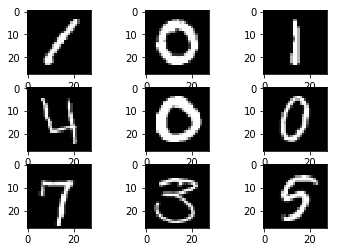

In [68]:
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(train_images[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

## Preparing the image data

In [0]:
#reshape data to fit model

train_images = train_images.astype('float32') /255

test_images_final = test_images_final.astype('float32') /255

## The network architecture

In [0]:
import tensorflow as tf
network = tf.keras.models.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(1, 1), data_format=None,input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    tf.keras.layers.ZeroPadding2D(padding=(1, 1), data_format=None),
    tf.keras.layers.Conv2D(64, (6,6), activation='relu'),
    tf.keras.layers.ZeroPadding2D(padding=(1, 1), data_format=None),
    tf.keras.layers.Conv2D(64, (7,7), activation='relu'),
    tf.keras.layers.MaxPooling2D(5,5),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(10, activation='softmax')
])

## The compilation step

In [0]:
from keras import optimizers

#network.compile(optimizer=RMSprop(lr=0.001),
network.compile(optimizer=Adam(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [72]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_12 (ZeroPaddi (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        832       
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 23, 23, 64)        73792     
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 19, 19, 64)        200768    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)          0         
__________

## Spliting the Train data 

In [0]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, y_train, test_size=0.15)

In [74]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
train_labels.shape



(35700, 10)

## Pre Processing

## Image augmentaion  
Creating another set of image augmentaion  

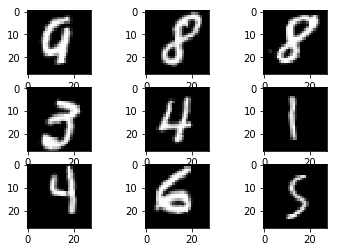

In [75]:
#datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen = ImageDataGenerator( rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
# fit parameters from data
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_trainS, y_trainS, batch_size=35700):
  
  break
  
X_trainE = X_batch
y_trainE = y_batch


for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_trainE[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
pyplot.show()




In [77]:

X_Combine = np.concatenate((X_train,X_trainE),axis=0)
y_combine = np.concatenate((train_labels,y_trainE),axis=0)
print(X_Combine.shape)
print(y_combine.shape)

(71400, 28, 28, 1)
(71400, 10)


## Preparing the labels

## Fit the Network

In [78]:
history = network.fit(X_Combine, y_combine, epochs=30, batch_size=512,validation_data=(X_test,test_labels))

Train on 71400 samples, validate on 6300 samples
Epoch 1/30
71400/71400 [==============================] - 9s 125us/sample - loss: 0.5492 - acc: 0.8382 - val_loss: 0.0686 - val_acc: 0.9824
Epoch 2/30
71400/71400 [==============================] - 8s 107us/sample - loss: 0.1366 - acc: 0.9603 - val_loss: 0.0354 - val_acc: 0.9902
Epoch 3/30
71400/71400 [==============================] - 8s 107us/sample - loss: 0.0916 - acc: 0.9735 - val_loss: 0.0282 - val_acc: 0.9924
Epoch 4/30
71400/71400 [==============================] - 8s 108us/sample - loss: 0.0704 - acc: 0.9792 - val_loss: 0.0223 - val_acc: 0.9941
Epoch 5/30
71400/71400 [==============================] - 8s 109us/sample - loss: 0.0587 - acc: 0.9820 - val_loss: 0.0223 - val_acc: 0.9929
Epoch 6/30
71400/71400 [==============================] - 8s 108us/sample - loss: 0.0496 - acc: 0.9854 - val_loss: 0.0162 - val_acc: 0.9946
Epoch 7/30
71400/71400 [==============================] - 8s 108us/sample - loss: 0.0444 - acc: 0.9868 - val_lo

## Model Performances 

In [79]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
print('test_acc:', test_acc)

6300/6300 [==============================] - 1s 97us/sample - loss: 0.0109 - acc: 0.9967
test_acc: 0.99666667


In [0]:
#Make Prediction
predict = network.predict(test_images_final)
#Convert the results to the digits value 
y_classes = [np.argmax(y, axis=None, out=None) for y in predict]

## Plotting the training and validation loss

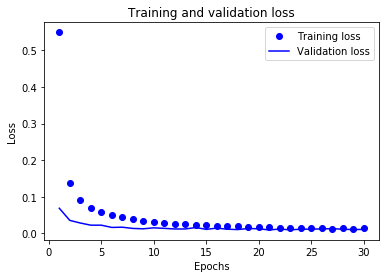

In [81]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range (1,len(history_dict['loss'])+1)
#epochs = range(1, 36)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
x = list(range(1, 28001))
df = pd.DataFrame({'ImageId' :x,'Label':y_classes})
df.to_csv("digitcnn2_E2.csv",index=False)


In [0]:
from google.colab import files
files.download('digitcnn2_E2.csv') 

## Example of Real Image